In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
# This code does not need to be modified!

import torchvision.datasets
import torchvision.transforms as transforms

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Lambda(lambda x: x.squeeze()),
                                ])

trainset = torchvision.datasets.MNIST(root='./data_mnist',
                                      train=True,
                                      download=True,
                                      transform=transform
                                      )

testset = torchvision.datasets.MNIST(root='./data_mnist',
                                     train=False,
                                     download=True,
                                     transform=transform
                                     )



In [3]:
# This code does not need to be modified!

bs=128

trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size=bs,
                                          shuffle=True,
                                          drop_last=True
                                          )

testloader = torch.utils.data.DataLoader(testset,
                                         batch_size=bs,
                                         shuffle=True,
                                         drop_last=True
                                         )

In [4]:
if torch.cuda.is_available():
  print('GPU is available!')
  device = torch.device('cuda')
else:
  print('GPU is not available!')
  device = torch.device('cpu')

GPU is available!


In [5]:
# This code does not need to be modified!

class TwoLayerNet(nn.Module):

    def __init__(self, input_size, hidden_size1, output_size):
        super(TwoLayerNet , self).__init__()
        
        self.layer1 = nn.Linear(input_size, hidden_size1, bias=False)
        self.layer2 = nn.Linear(hidden_size1, output_size, bias=False)
        
    def forward(self, x):
        y       = self.layer1(x)
        y_hat   = F.relu(y)
        z       = self.layer2(y_hat)
        return F.softmax(z, dim=1)
  

In [ ]:
net=TwoLayerNet(784, 64, 10).to(device)  # Move the model to GPU

criterion = nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(net.parameters() , lr=0.1)
# optimizer=torch.optim.Adam(net.parameters())

results = []

for epoch in range(0, 17):
    print("Starting epoch: ", epoch)
    if epoch > 0:
        for i, (minibatch_data, minibatch_label) in enumerate(trainloader):
              minibatch_data, minibatch_label = minibatch_data.to(device), minibatch_label.to(device)  # Move the data to GPU
        
              # Set dL/dU, dL/dV, dL/dW to be filled with zeros
              optimizer.zero_grad()
              
              #reshape the minibatch
              inputs = minibatch_data.view(bs, 784)
        
              # forward the minibatch through the net  
              prob=net(inputs) 
              
              # Compute the average of the losses of the data points in the minibatch
              loss = criterion(prob , minibatch_label) 
              
              # backward pass to compute dL/dU, dL/dV and dL/dW    
              loss.backward()
              
              # do one step of stochastic gradient descent: U=U-lr(dL/dU), V=V-lr(dL/dU), ...
              optimizer.step()
      
    # Evaluate the model on the test set
    print("Finished training, starting evaluation...")
    correct_total = 0
    for i, (x_batch, y_batch) in enumerate(testloader):
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)  # Move the data to the device that is used
        
            y_pred = net(x_batch.view(bs, 784))
            y_pred_max = torch.argmax(y_pred, dim=1)
        
            correct_total += torch.sum(torch.eq(y_pred_max, y_batch)).item()
    accuracy = correct_total / len(testset.data)
    print(accuracy)
    results.append((epoch, accuracy))

In [8]:
class SLayerNet(nn.Module):

    def __init__(self, input_size, hidden_size, layers, output_size):
        super(SLayerNet , self).__init__()
        self.nr_l = layers
        self.layer1 = nn.Linear(input_size, hidden_size, bias=False)
        self.layerS = nn.Linear(hidden_size, hidden_size, bias=False)
        self.layer2 = nn.Linear(hidden_size, output_size, bias=False)
        
    def forward(self, x):
        y       = self.layer1(x)
        y_hat   = F.relu(y)
        h_hat = y_hat
        for s in range(self.nr_l):
            h = self.layerS(h_hat)
            h_hat = F.relu(h)
        z = self.layer2(h_hat)
        return F.softmax(z, dim=1)

In [9]:
results = []
for l in range(1,6):
    net=SLayerNet(784, 64, l, 10).to(device)  # Move the model to GPU
    
    criterion = nn.CrossEntropyLoss()
    # optimizer=torch.optim.SGD(net.parameters() , lr=0.1)
    optimizer=torch.optim.Adam(net.parameters())
    
    for epoch in range(0, 17):
        print("Starting epoch: ", epoch)
        for i, (minibatch_data, minibatch_label) in enumerate(trainloader):
              minibatch_data, minibatch_label = minibatch_data.to(device), minibatch_label.to(device)  # Move the data to GPU
        
              # Set dL/dU, dL/dV, dL/dW to be filled with zeros
              optimizer.zero_grad()
              
              #reshape the minibatch
              inputs = minibatch_data.view(bs, 784)
        
              # forward the minibatch through the net  
              prob=net(inputs) 
              
              # Compute the average of the losses of the data points in the minibatch
              loss = criterion(prob , minibatch_label) 
              
              # backward pass to compute dL/dU, dL/dV and dL/dW    
              loss.backward()
              
              # do one step of stochastic gradient descent: U=U-lr(dL/dU), V=V-lr(dL/dU), ...
              optimizer.step()
      
    # Evaluate the model on the test set
    print("Finished training, starting evaluation...")
    correct_total = 0
    for i, (x_batch, y_batch) in enumerate(testloader):
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)  # Move the data to the device that is used
        
            y_pred = net(x_batch.view(bs, 784))
            y_pred_max = torch.argmax(y_pred, dim=1)
        
            correct_total += torch.sum(torch.eq(y_pred_max, y_batch)).item()
    accuracy = correct_total / len(testset.data)
    print(accuracy)
    results.append((l, accuracy))

Starting epoch:  0
Starting epoch:  1
Starting epoch:  2
Starting epoch:  3
Starting epoch:  4
Starting epoch:  5
Starting epoch:  6
Starting epoch:  7
Starting epoch:  8
Starting epoch:  9
Starting epoch:  10
Starting epoch:  11
Starting epoch:  12
Starting epoch:  13
Starting epoch:  14
Starting epoch:  15
Starting epoch:  16
Finished training, starting evaluation...
0.9688
Starting epoch:  0
Starting epoch:  1
Starting epoch:  2
Starting epoch:  3
Starting epoch:  4
Starting epoch:  5
Starting epoch:  6
Starting epoch:  7
Starting epoch:  8
Starting epoch:  9
Starting epoch:  10
Starting epoch:  11
Starting epoch:  12
Starting epoch:  13
Starting epoch:  14
Starting epoch:  15
Starting epoch:  16
Finished training, starting evaluation...
0.9642
Starting epoch:  0
Starting epoch:  1
Starting epoch:  2
Starting epoch:  3
Starting epoch:  4
Starting epoch:  5
Starting epoch:  6
Starting epoch:  7
Starting epoch:  8
Starting epoch:  9
Starting epoch:  10
Starting epoch:  11
Starting epo

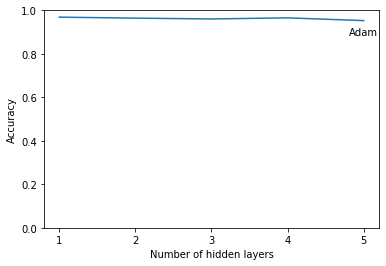

In [12]:
# This code does not need to be modified!

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

plt.plot(*zip(*results))
plt.ylim([0,1])
plt.ylabel("Accuracy")
if type(net) is SLayerNet:
    plt.xlabel("Number of hidden layers")
    plt.xticks(np.arange(1, 6, step=1))
else:
    plt.xlabel("Number of Epochs")
    plt.xticks(np.arange(1, 17, step=1))
opti_name = optimizer.__class__.__name__
plt.text(5, 0.9, opti_name, horizontalalignment='center', verticalalignment='center')
# plt.savefig('./figs/%s_acc-vs-epochs.png' % opti_name)
plt.savefig('./figs/%s_acc-vs-layers.png' % opti_name)
# plt.show()
